# PART A

In [25]:
# Import relevant libraries
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Read the excel file
data = pd.read_excel("Football_Players.xlsx")

# Drop player before standardization
df = data.drop(['Player'], axis=1)

df.head()

,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
0,107,166,45.3,1172,7.1,167.5,12,4
1,238,353,47.3,2829,8.0,188.7,20,4
2,207,347,41.9,2324,6.7,145.3,20,9
3,252,392,44.9,2975,7.6,198.4,22,11
4,66,119,38.9,760,6.4,152.0,4,4


In [26]:
# Import the scaler and standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

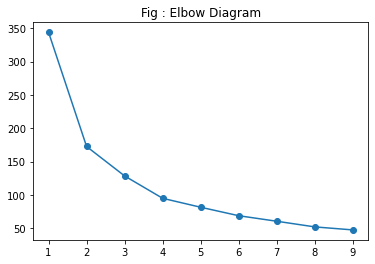

In [27]:
# Perform elbow analysis to see the best number of clusters for our data
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig : Elbow Diagram");

We can see that the optimal number of clusters is 3

In [28]:
# Perform KMeans clustering on the standardized data
clusters = KMeans(3, random_state=10)
clusters.fit(scaled_df)

# Set the clusterid of each data entry
df["clusterid"] = clusters.labels_

# Group the clusters by clusterId and get their respective size
df.groupby([df.clusterid]).size()

clusterid
0    13
1    16
2    14
dtype: int64

Largest cluster is cluster.id = 1

In [29]:
# Print the center point of the largest cluster
print('Center point of cluster 1: ', clusters.cluster_centers_[1])

Center point of cluster 1:  [-1.18192078 -1.19840939 -0.5581738  -1.15831412 -0.43900822 -0.56909111
 -1.02006765 -0.82023238]


# PART B

In [ ]:
# Import relevant libraries
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Read the data from the excel file
data = pd.read_excel("Health_Population.xlsx")
data.head()

In [ ]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform( data[['Death Rate', 'Health Expend', 'Life Exp', 'Male Mortality', 'Female Mortality']] )

Data Standardization is important as some values are small while others are quite large. To avoid skewness we should standardize our data.

In [ ]:
# Perform elbow analysis to see the best number of clusters for our data
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig : Elbow Diagram");

Using the elbow method we can see that optimal clusters will be 3


In [ ]:
# Perform KMeans clustering on the standardized data using our optimal clusters we obtaining elbow testing
clusters = KMeans(3, random_state=10)
clusters.fit(scaled_df)
data["clusterid"] = clusters.labels_

# Group the clusters by size and print the size of each cluster
data.groupby([data.clusterid]).size()

We can see that cluster with clusterID = 1 is the largest cluster

In [ ]:
# Print the largest cluster
data[data.clusterid == 1]

In [ ]:
# Calculate the average GNI per capital for the largest cluster
(data[data.clusterid == 1]['GNI']).mean()

# PART C

In [ ]:
# Import relevant library
import pandas as pd

# Read the data 
data = pd.read_excel("Sanjay.xlsx")
data.head()

Yes, Sanjay should standardize the data as some values are very big comparative to other values. If not standardized the results will be skewed. 

In [ ]:
# Import the scaler and standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform( data[['Less than HS', 'HS', 'SC', 'Bachelor']] )

In [ ]:
# Perform elbow analysis to get the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig : Elbow Diagram");

Using the elbow diagram we can see 3 to be optimal clusters 

In [ ]:
# Import the Agglomerative Clustering and perform on our dataset

from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering( 3 )
clusters.fit( scaled_df )

# Add the clusterid to our data
data["clusterid"] = clusters.labels_

# Group the clusters by clusterid and get the size of each cluster
data.groupby([data.clusterid]).size()

We can see by the sizes that clusterid = 1 is the largest cluster

In [ ]:
# Plot the dendrogram of Sanjay's data
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sns.clustermap(scaled_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
plt.title( "Fig: Dendrogram of Sanjay's Dataset");


We can see from the dendrogram that data points 10 and 52 are very similar, we can say the same about 41 and 12. For the attribute Less than HS data points 8 and 37 are very close. Whereas 8 and 12 are very far away. 

In [ ]:
# Print the largest cluster
data[data.clusterid == 1]

In [ ]:
# Calculate the average median household income of the largest cluster of community areas
data[data.clusterid == 1]['Income'].mean()

# PART D

In [ ]:
# Import relevant libraries
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Read the excel file
data = pd.read_csv("covid19.csv")
data.head()

# Clean the data by dropping the null values
data = data.dropna()

# Group the data by Combined_key
df = data.groupby(['Combined_Key'])['Confirmed', 'Recovered', 'Deaths'].sum().reset_index()
df.head()

In [ ]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform( df[['Confirmed', 'Recovered', 'Deaths']] )

In [ ]:
# Perform elbow analysis to get the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig : Elbow Diagram");

We can see the optimal clusters will be 2

In [ ]:
# Perform KMeans clustering on the standardized data using our optimal clusters we obtaining elbow testing
clusters = KMeans(3, random_state=10)
clusters.fit(scaled_df)
df["clusterid"] = clusters.labels_

# Group the clusters by size and print the size of each cluster
df.groupby([df.clusterid]).size()

In [ ]:
# Print the largest cluster
df[df.clusterid == 0]

In [ ]:
df[df.clusterid == 1]

In [ ]:
df[df.clusterid == 2]

We can see from the 3 clusters that clusterid == 2 and clusterid == 1 represent just a few data points. Upon further inspection we see that these data points are outliers in our data. Enteries with clusterid == 1 represent just 1 city  with very high confirmed cases and death tolls. Clusterid==2 represents enteries with very moderate number of confirmed and recovered cases. Clusterid == 0 has the all the other values which have low values of all 3 attributes.